In [36]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import json
import matplotlib.pyplot as plt
from data import read_csv_cif, read_defects_descriptions, read_flat

## Load and explore a subset of data

The path assumes we are in the project tree. If you just downloaded the archive, chage it.

In [3]:
example_dataset_path = Path("/Users/rmgaliullin/ai4material_design/datasets/csv_cif/dichalcogenides_MoS2_all")

In [59]:
BP_structures, BP_defects = read_csv_cif(example_dataset_path)
BP_targets = pd.read_csv("/Users/rmgaliullin/ai4material_design/datasets/processed/dichalcogenides_MoS2_all/targets.csv.gz", index_col="_id")

  0%|          | 0/9422 [00:00<?, ?it/s]/Users/rmgaliullin/ai4material_design/.venv/lib/python3.11/site-packages/pymatgen/io/cif.py:1168: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
100%|██████████| 9422/9422 [02:06<00:00, 74.69it/s]


In [64]:
data = [BP_structures, BP_defects, BP_targets]

`BP_structures` contains the initial unrelaxed structures, along with the high-level variables computed with DFT

In [60]:
BP_structures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9422 entries, 6141cf0efbfd4bd9ab2c2f7e to 61524ab7b44c3cef9d45fba8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   descriptor_id      9422 non-null   object 
 1   energy             9422 non-null   float64
 2   energy_per_atom    9422 non-null   float64
 3   fermi_level        9422 non-null   float64
 4   homo               9422 non-null   float64
 5   lumo               9422 non-null   float64
 6   initial_structure  9422 non-null   object 
dtypes: float64(5), object(2)
memory usage: 588.9+ KB


In [61]:
BP_structures.head()

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,initial_structure
_id,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,6141cf0efbfd4bd9ab2c2f7c,-1391.340414,-7.284505,-0.199707,-0.6754,0.4698,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...
6141cf0f51c1cbd9654b8870,6141cf0e51c1cbd9654b886e,-1384.552821,-7.287120,-0.220627,-0.6852,0.3991,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...
6141cf0fe689ecc4c43cdd4b,6141cf0fe689ecc4c43cdd49,-1397.196141,-7.277063,-0.183537,-0.6931,1.1102,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...
6141cf10b842c2e72e2f2d44,6141cf10b842c2e72e2f2d42,-1396.257593,-7.272175,-0.179802,-0.6916,1.1179,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...
6141cf1051c1cbd9654b8872,6141cf0e51c1cbd9654b886e,-1384.532677,-7.287014,-0.213190,-0.6718,0.4384,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...


In [62]:
BP_defects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 6141cf0efbfd4bd9ab2c2f7c to 6151846bb44c3cef9d45f812
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  85 non-null     object
 1   base         85 non-null     object
 2   cell         85 non-null     object
 3   pbc          85 non-null     object
 4   defects      85 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [63]:
BP_defects.head()

,description,base,cell,pbc,defects
_id,,,,,
6141cf0efbfd4bd9ab2c2f7c,X1,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}]"
6141cf0e51c1cbd9654b886e,X2,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':..."
6141cf0fe689ecc4c43cdd49,X3,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '..."
6141cf10b842c2e72e2f2d42,X4,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '..."
6141cf10cc0e69a0cf28ab33,X5,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':..."


We can merge the defect descriptions and targets into a single DataFrame

In [65]:
BP_flat = BP_structures.combine_first(BP_targets).merge(BP_defects, how="left", left_on="descriptor_id", right_index=True)

In [66]:
BP_flat['defect_count'] = BP_flat['defects'].apply(lambda x: len(x))

In [67]:
BP_flat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9422 entries, 6141cf0efbfd4bd9ab2c2f7e to 61524ab7b44c3cef9d45fba8
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   band_gap                   9422 non-null   float64
 1   descriptor_id              9422 non-null   object 
 2   energy                     9422 non-null   float64
 3   energy_per_atom            9422 non-null   float64
 4   fermi_level                9422 non-null   float64
 5   formation_energy           9422 non-null   float64
 6   formation_energy_per_site  9422 non-null   float64
 7   homo                       9422 non-null   float64
 8   initial_structure          9422 non-null   object 
 9   lumo                       9422 non-null   float64
 10  description                9422 non-null   object 
 11  base                       9422 non-null   object 
 12  cell                       9422 non-null   object 
 13  pbc       

In [103]:
import pandas as pd

# Assuming the DataFrame is called 'df'
BP_flat['concatenated_defects'] = BP_flat['defects'].apply(lambda x: ''.join(sorted([str(x) for i in x])))

# Print the updated DataFrame
BP_flat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9422 entries, 6141cf0efbfd4bd9ab2c2f7e to 61524ab7b44c3cef9d45fba8
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   band_gap                   9422 non-null   float64
 1   descriptor_id              9422 non-null   object 
 2   energy                     9422 non-null   float64
 3   energy_per_atom            9422 non-null   float64
 4   fermi_level                9422 non-null   float64
 5   formation_energy           9422 non-null   float64
 6   formation_energy_per_site  9422 non-null   float64
 7   homo                       9422 non-null   float64
 8   initial_structure          9422 non-null   object 
 9   lumo                       9422 non-null   float64
 10  description                9422 non-null   object 
 11  base                       9422 non-null   object 
 12  cell                       9422 non-null   object 
 13  pbc       

In [68]:
BP_flat.head()

,band_gap,descriptor_id,energy,energy_per_atom,fermi_level,formation_energy,formation_energy_per_site,homo,initial_structure,lumo,description,base,cell,pbc,defects,defect_count
_id,,,,,,,,,,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,1.1452,6141cf0efbfd4bd9ab2c2f7c,-1391.340414,-7.284505,-0.199707,2.645686,2.645686,-0.6754,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.4698,X1,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}]",1
6141cf0f51c1cbd9654b8870,1.0843,6141cf0e51c1cbd9654b886e,-1384.552821,-7.287120,-0.220627,5.306279,2.653139,-0.6852,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.3991,X2,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':...",2
6141cf0fe689ecc4c43cdd4b,1.8033,6141cf0fe689ecc4c43cdd49,-1397.196141,-7.277063,-0.183537,0.278959,0.278959,-0.6931,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,1.1102,X3,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '...",1
6141cf10b842c2e72e2f2d44,1.8095,6141cf10b842c2e72e2f2d42,-1396.257593,-7.272175,-0.179802,0.579507,0.289753,-0.6916,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,1.1179,X4,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '...",2
6141cf1051c1cbd9654b8872,1.1102,6141cf0e51c1cbd9654b886e,-1384.532677,-7.287014,-0.213190,5.326423,2.663212,-0.6718,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.4384,X2,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':...",2


Visualisation

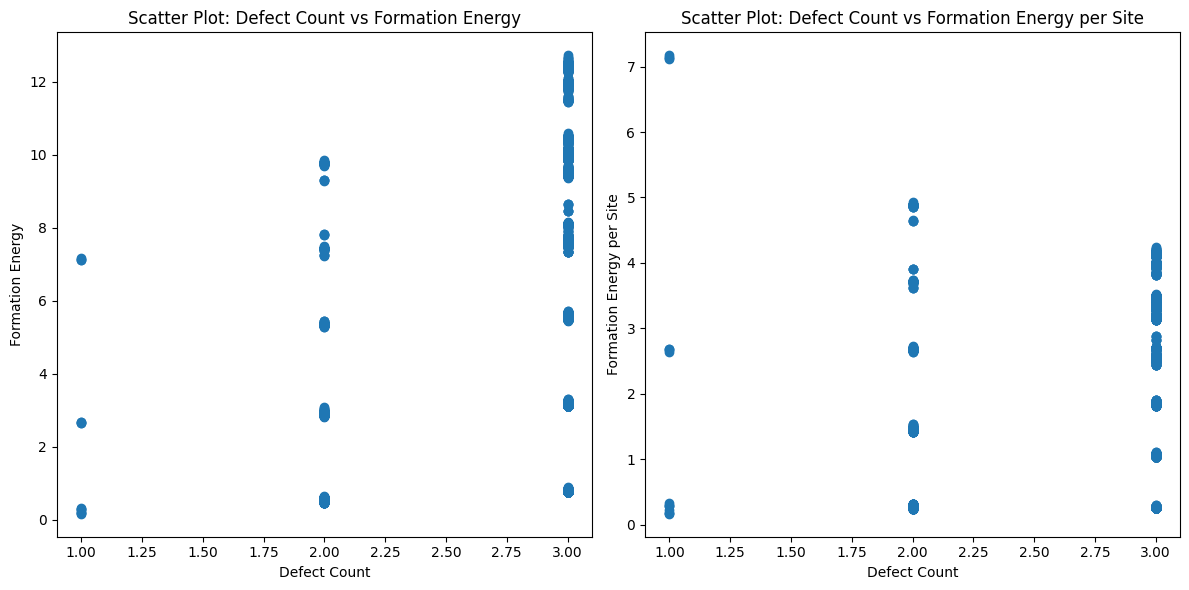

In [69]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for defect_count vs formation_energy
ax1.scatter(BP_flat['defect_count'], BP_flat['formation_energy'])
ax1.set_xlabel('Defect Count')
ax1.set_ylabel('Formation Energy')
ax1.set_title('Scatter Plot: Defect Count vs Formation Energy')

# Scatter plot for defect_count vs formation_energy_per_site
ax2.scatter(BP_flat['defect_count'], BP_flat['formation_energy_per_site'])
ax2.set_xlabel('Defect Count')
ax2.set_ylabel('Formation Energy per Site')
ax2.set_title('Scatter Plot: Defect Count vs Formation Energy per Site')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the figure with both subplots
plt.show()

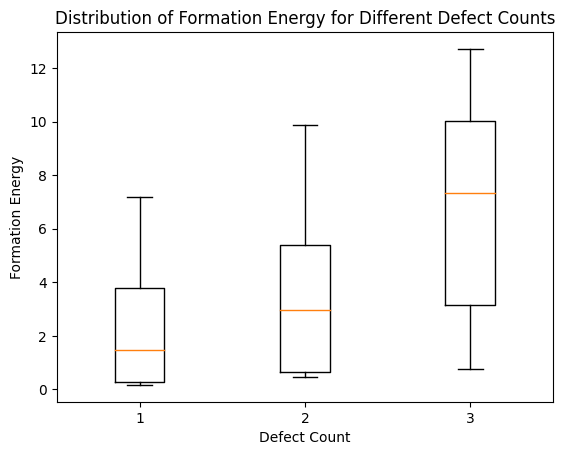

In [70]:
# Create a list of formation_energy for each defect_count value
data = [BP_flat.loc[BP_flat['defect_count'] == count]['formation_energy'] for count in BP_flat['defect_count'].unique()]
# print(data[0])
# Plot a box plot for each defect_count group
fig, ax = plt.subplots()
ax.boxplot(data, labels=BP_flat['defect_count'].unique())

ax.set_xlabel('Defect Count')
ax.set_ylabel('Formation Energy')
ax.set_title('Distribution of Formation Energy for Different Defect Counts')

plt.show()

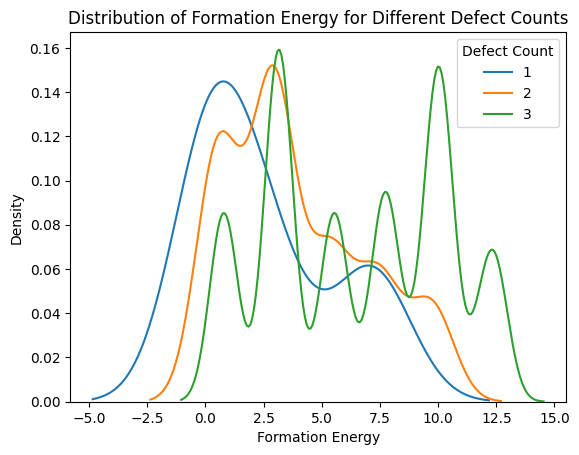

In [71]:
# Create a line plot for each defect_count group
fig, ax = plt.subplots()

# Group the data by defect_count and get the formation_energy for each group
grouped_data = BP_flat.groupby('defect_count')['formation_energy'].apply(list)

for count, energy_list in grouped_data.items():
    sns.kdeplot(energy_list, ax=ax, label=str(count))

ax.set_xlabel('Formation Energy')
ax.set_ylabel('Density')
ax.set_title('Distribution of Formation Energy for Different Defect Counts')
ax.legend(title='Defect Count')

plt.show()

In [72]:
np.unique([str(j) for i in BP_flat['defects'] for j in i])

array(["{'type': 'substitution', 'from': 'Mo', 'to': 'W'}",
       "{'type': 'substitution', 'from': 'S', 'to': 'Se'}",
       "{'type': 'vacancy', 'element': 'Mo'}",
       "{'type': 'vacancy', 'element': 'S'}"], dtype='<U49')

In [73]:
np.unique([j['type'] for i in BP_flat['defects'] for j in i])

array(['substitution', 'vacancy'], dtype='<U12')

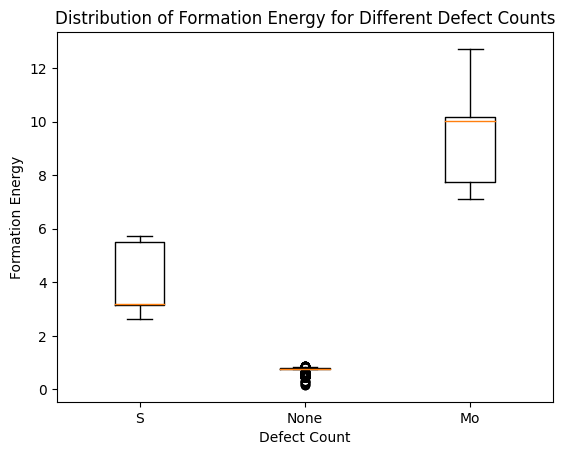

In [74]:
# Extract type of vacancy from the dictionary in 'defects' column
def get_vacancy_type(defects):
    for i in defects:
        if i['type'] == 'vacancy':
            return i['element']
    return "None"
BP_flat['vacancy_type'] = BP_flat['defects'].apply(get_vacancy_type)

# Filter rows with non-null vacancy_type
# BP_flat_filtered = BP_flat.dropna(subset=['vacancy_type'])
data = [BP_flat.loc[BP_flat['vacancy_type'] == vacancy_type]['formation_energy'] for vacancy_type in BP_flat['vacancy_type'].unique()]

fig, ax = plt.subplots()
ax.boxplot(data, labels=BP_flat['vacancy_type'].unique())

ax.set_xlabel('Defect Count')
ax.set_ylabel('Formation Energy')
ax.set_title('Distribution of Formation Energy for Different Defect Counts')

plt.show()

In [101]:
# Define the defect types
defect_types = ["{'type': 'substitution', 'from': 'Mo', 'to': 'W'}",
                "{'type': 'substitution', 'from': 'S', 'to': 'Se'}",
                "{'type': 'vacancy', 'element': 'Mo'}",
                "{'type': 'vacancy', 'element': 'S'}"]

# Create indicator columns
for defect_type in defect_types:
    column_name = ""
    if "vacancy" in defect_type:
        column_name+="vacancy_"
    if "substitution" in defect_type:
        column_name+="substitution_"
    if "element" in defect_type:
        column_name+='Mo' if 'Mo' in defect_type else 'S'
    if "from" in defect_type:
        column_name+='Mo_W' if 'Mo' in defect_type else 'S_Se'

    BP_flat[column_name] = BP_flat['defects'].apply(lambda x: sum([int(str(i) == defect_type) for i in x]))

# Print the updated DataFrame
BP_flat.head()

,band_gap,descriptor_id,energy,energy_per_atom,fermi_level,formation_energy,formation_energy_per_site,homo,initial_structure,lumo,...,base,cell,pbc,defects,defect_count,vacancy_type,substitution_Mo_W,substitution_S_Se,vacancy_Mo,vacancy_S
_id,,,,,,,,,,,,,,,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,1.1452,6141cf0efbfd4bd9ab2c2f7c,-1391.340414,-7.284505,-0.199707,2.645686,2.645686,-0.6754,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.4698,...,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}]",1,S,0,0,0,1
6141cf0f51c1cbd9654b8870,1.0843,6141cf0e51c1cbd9654b886e,-1384.552821,-7.287120,-0.220627,5.306279,2.653139,-0.6852,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.3991,...,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':...",2,S,0,0,0,2
6141cf0fe689ecc4c43cdd4b,1.8033,6141cf0fe689ecc4c43cdd49,-1397.196141,-7.277063,-0.183537,0.278959,0.278959,-0.6931,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,1.1102,...,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '...",1,None,0,1,0,0
6141cf10b842c2e72e2f2d44,1.8095,6141cf10b842c2e72e2f2d42,-1396.257593,-7.272175,-0.179802,0.579507,0.289753,-0.6916,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,1.1179,...,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'substitution', 'from': 'S', 'to': '...",2,None,0,2,0,0
6141cf1051c1cbd9654b8872,1.1102,6141cf0e51c1cbd9654b886e,-1384.532677,-7.287014,-0.213190,5.326423,2.663212,-0.6718,[[1.27612628e-07 1.84192955e+00 3.71975100e+00...,0.4384,...,MoS2,"(8, 8, 1)","[True, True, False]","[{'type': 'vacancy', 'element': 'S'}, {'type':...",2,S,0,0,0,2


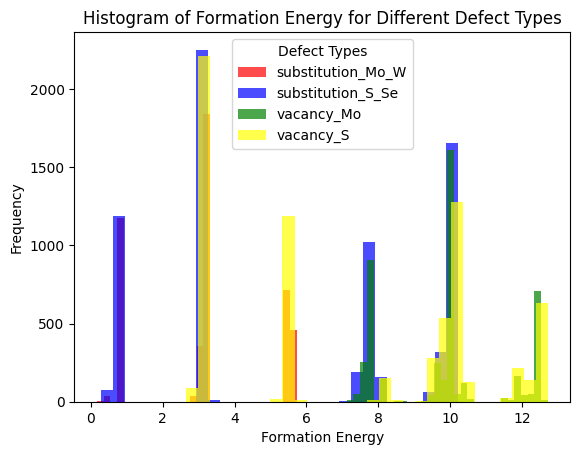

In [85]:
import matplotlib.pyplot as plt

# Define a mapping of column names to colors for the histograms
defects_colors = {
    'substitution_Mo_W': 'red',
    'substitution_S_Se': 'blue',
    'vacancy_Mo': 'green',
    'vacancy_S': 'yellow'
}

# Create an empty plot
fig, ax = plt.subplots()

# Plot a histogram for formation_energy for each defect type
for defect, color in defects_colors.items():
    filtered_df = BP_flat[BP_flat[defect]]
    ax.hist(filtered_df['formation_energy'], bins=30, alpha=0.7, color=color, label=defect)

# Add legend, labels, and title
ax.legend(title='Defect Types')
ax.set_xlabel('Formation Energy')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Formation Energy for Different Defect Types')

# Display the plot
plt.show()

In [87]:
defect_types = ['substitution_Mo_W', 'substitution_S_Se', 'vacancy_Mo', 'vacancy_S']

max_defects_number = BP_flat['defects'].apply(len).max()
max_defects_number

3

In [16]:
example_structure_id = BP_flat.index[5]
example_structure_id

'6141cf10b842c2e72e2f2d46'

In [17]:
BP_flat.loc[example_structure_id].defects

[{'type': 'substitution', 'from': 'S', 'to': 'Se'},
 {'type': 'substitution', 'from': 'S', 'to': 'Se'}]

In [18]:
BP_flat.loc[example_structure_id].initial_structure

Structure Summary
Lattice
    abc : 25.5225256 25.5225256 14.879004
 angles : 90.0 90.0 119.99999999999999
 volume : 8393.668021812642
      A : 25.5225256 0.0 1.5628039641098191e-15
      B : -12.761262799999997 22.103155538338676 1.5628039641098191e-15
      C : 0.0 0.0 14.879004
    pbc : True True True
PeriodicSite: Mo0 (Mo) (1.276e-07, 1.842, 3.72) [0.04167, 0.08333, 0.25]
PeriodicSite: Mo1 (Mo) (-1.595, 4.605, 3.72) [0.04167, 0.2083, 0.25]
PeriodicSite: Mo2 (Mo) (-3.19, 7.368, 3.72) [0.04167, 0.3333, 0.25]
PeriodicSite: Mo3 (Mo) (-4.785, 10.13, 3.72) [0.04167, 0.4583, 0.25]
PeriodicSite: Mo4 (Mo) (-6.381, 12.89, 3.72) [0.04167, 0.5833, 0.25]
PeriodicSite: Mo5 (Mo) (-7.976, 15.66, 3.72) [0.04167, 0.7083, 0.25]
PeriodicSite: Mo6 (Mo) (-9.571, 18.42, 3.72) [0.04167, 0.8333, 0.25]
PeriodicSite: Mo7 (Mo) (-11.17, 21.18, 3.72) [0.04167, 0.9583, 0.25]
PeriodicSite: Mo8 (Mo) (3.19, 1.842, 3.72) [0.1667, 0.08333, 0.25]
PeriodicSite: Mo9 (Mo) (1.595, 4.605, 3.72) [0.1667, 0.2083, 0.25]
Per

In [10]:
from ase.visualize import view
from pymatgen.io.ase import AseAtomsAdaptor

In [11]:
# Crashes at CRP, but might work for you
# view(AseAtomsAdaptor.get_atoms(BP_structures.loc[example_structure_id].initial_structure), viewer='ngl')
view(AseAtomsAdaptor.get_atoms(BP_structures.loc[example_structure_id].initial_structure), viewer='x3d')

If needed, we can dive into the VASP outputs:

In [12]:
from pathlib import Path
from pymatgen.io.vasp.outputs import Vasprun, Outcar

vasp_folder = Path(f"../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_{example_structure_id}/01_relax")
vasprun = Vasprun(vasp_folder / "vasprun.xml", parse_potcar_file=False, separate_spins=True, parse_dos=True)

If you want to look at VASP output, you probably know what you are doing, but just in case here is pymetgen documentation:
https://pymatgen.org/pymatgen.io.vasp.outputs.html#pymatgen.io.vasp.outputs.Vasprun

In [13]:
print(vasprun.final_energy)

-760.1626739 eV


List of other VASP outputs available

In [14]:
list(vasp_folder.iterdir())

[PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/CHGCAR'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/OSZICAR'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/IBZKPT'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/EIGENVAL'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/XDATCAR'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/OUTCAR'),
 PosixPath('../../datasets/raw_vasp/high_density_defects/BP_spin_500/poscar_P_P141N1_dd6a5668-efc9-4f4c-aee8-ac3472eaf09f/01_relax/CHG'),
 PosixPath('

# Load all the structures

In [15]:
extracted_data_root = Path("../../datasets/others/rolos/2d-materials-point-defects/2d-materials-point-defects-all/")
datasets = [extracted_data_root / f"high_density_defects/{name}_500" for name in ("BP_spin", "GaSe_spin", "hBN_spin", "InSe_spin", "MoS2", "WSe2")] + \
           [extracted_data_root / f"low_density_defects/{name}" for name in ("MoS2", "WSe2")]

In [16]:
import os
from multiprocessing import Pool
if 'ROLOS_AVAILABLE_CPU' in os.environ:
    n_cpus = int(os.environ['ROLOS_AVAILABLE_CPU'])
else:
    n_cpus = None
with Pool(processes=n_cpus) as pool:
    data = pool.map(read_flat, datasets)

  0%|          | 0/500 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pymatgen/io/cif.py:1148: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
  0%|          | 0/500 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/pymatgen/io/cif.py:1148: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
  0%|          | 0/500 [00:00<?, ?it/s]24.11it/s]/usr/local/lib/python3.8/dist-packages/pymatgen/io/cif.py:1148: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [17]:
flat_2DMMD = pd.concat(data, axis=0)

In [20]:
print(f"Loaded {len(flat_2DMMD)} structures")

Loaded 14866 structures
